# Classification of emotions

## Importing the libraries

In [1]:
!pip install tensorflow-gpu==2.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting unin

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading the images

In [3]:
path = 'fer2013_2_classes.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

### Train and test set

In [6]:
training_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=7,
                                     horizontal_flip=True,
                                     zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('fer2013_2_classes/train',
                                                       target_size=(128, 128),
                                                       batch_size=16,
                                                       class_mode='categorical',
                                                       shuffle=True)

Found 11210 images belonging to 2 classes.


In [7]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('fer2013_2_classes/validation',
                                                       target_size=(128, 128),
                                                       batch_size=16,
                                                       class_mode='categorical',
                                                       shuffle=False)

Found 1370 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'Angry': 0, 'Happy': 1}

In [9]:
test_dataset.class_indices

{'Angry': 0, 'Happy': 1}

## Building and training the convolutional neural network

In [13]:
num_detectors = 32 # feature detectors
num_classes = 2
width, height = 128, 128

model = Sequential()
model.add(Conv2D(num_detectors, (3,3), activation='relu', padding='same', input_shape=(width,height,3)))
model.add(BatchNormalization()) # Normalize Conv2D
model.add(Conv2D(num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(4*num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(4*num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(8*num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(8*num_detectors, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(8193, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(8193, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_10 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_11 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                      

In [15]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_dataset, epochs=20)

Epoch 1/20
701/701 [==============================] - 100s 128ms/step - loss: 1.3141 - accuracy: 0.5849
Epoch 2/20
701/701 [==============================] - 71s 101ms/step - loss: 1.0648 - accuracy: 0.6106
Epoch 3/20
701/701 [==============================] - 70s 100ms/step - loss: 1.0595 - accuracy: 0.6396
Epoch 4/20
701/701 [==============================] - 71s 101ms/step - loss: 1.0627 - accuracy: 0.6744
Epoch 5/20
701/701 [==============================] - 69s 98ms/step - loss: 0.8661 - accuracy: 0.7220
Epoch 6/20
701/701 [==============================] - 71s 101ms/step - loss: 0.9041 - accuracy: 0.7338
Epoch 7/20
701/701 [==============================] - 71s 101ms/step - loss: 0.7927 - accuracy: 0.7492
Epoch 8/20
701/701 [==============================] - 69s 98ms/step - loss: 0.8598 - accuracy: 0.7485
Epoch 9/20
701/701 [==============================] - 71s 102ms/step - loss: 0.8034 - accuracy: 0.7440
Epoch 10/20
701/701 [==============================] - 71s 101ms/step - lo

## Evaluating the neural network

In [16]:
model.evaluate(test_dataset)

86/86 [==============================] - 2s 19ms/step - loss: 2.2513 - accuracy: 0.8723


[2.2513418197631836, 0.8722627758979797]

In [17]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)

86/86 [==============================] - 1s 14ms/step


In [18]:
accuracy_score(test_dataset.classes, predictions)

0.8722627737226277

In [19]:
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[425,  66],
       [109, 770]])

<Axes: >

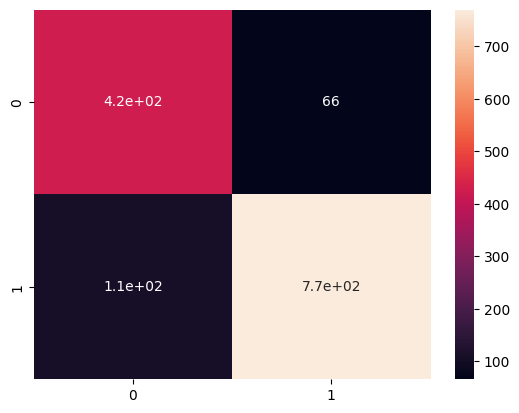

In [20]:
sns.heatmap(cm, annot=True)

In [21]:
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       491
           1       0.92      0.88      0.90       879

    accuracy                           0.87      1370
   macro avg       0.86      0.87      0.86      1370
weighted avg       0.88      0.87      0.87      1370

